Suicide is a very serious mental health issue that has to be addressed properly. 
This dataset contains information on suicide in the many countries from 1985  to 2016. According to SSM Health, 
suicide is the leading cause of death among all American adults and rates are increasing in both males and females.
Features of the dataset; 
   -HDI-human development index, it is a measure (between 0 and 1) of the key economic and human development 
   -Suicides/100k pop-number of suicides per every 100,000 population

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/bambino/Documents/DATASETS/world_suicide_rate.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [5]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
df.drop(['country-year','HDI for year'],axis=1,inplace=True)#dropping unnecessary columns 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [8]:
df.rename(columns={' gdp_for_year ($)':'gdp_for_year ($)'},inplace=True)#renaming column to remove unnecessary spacing.

In [9]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [10]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

## What generation has the Highest/lowest suicide rate?


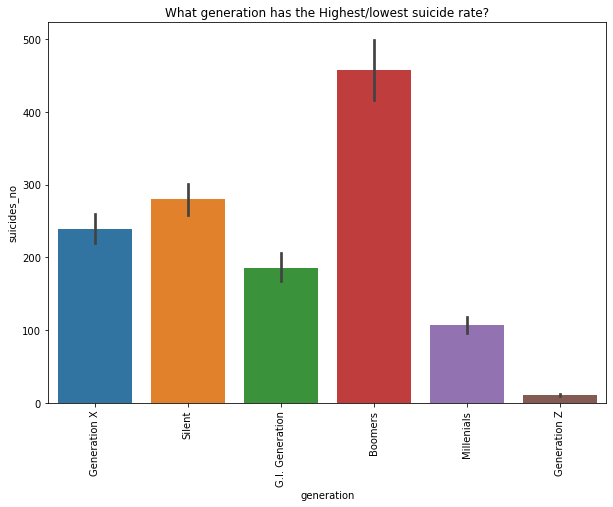

In [11]:
#What generation has the Highest/lowest suicide rate?
plt.figure(figsize=(10,7))
sns.barplot(df['generation'],df['suicides_no'])
plt.title('What generation has the Highest/lowest suicide rate?')
plt.xticks(rotation=90);

## Suicide rates by gender

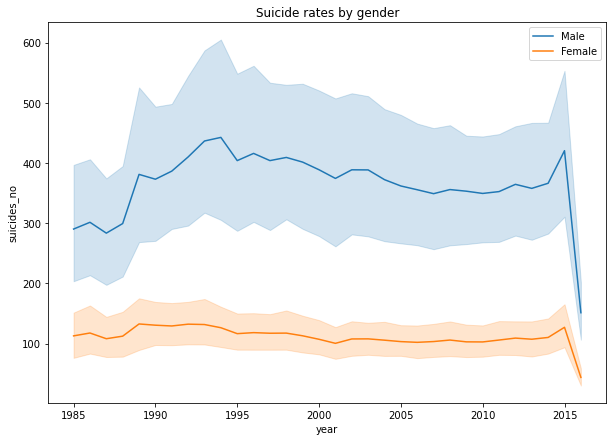

In [12]:
male=df.loc[df.loc[:,'sex']=='male',:]
female=df.loc[df.loc[:,'sex']=='female',:]
plt.figure(figsize=(10,7))
sns.lineplot(x='year',y='suicides_no',data=male,label='Male')
sns.lineplot(x='year',y='suicides_no',data=female,label='Female')
plt.title('Suicide rates by gender');

## What countries have the highest suicide rates?


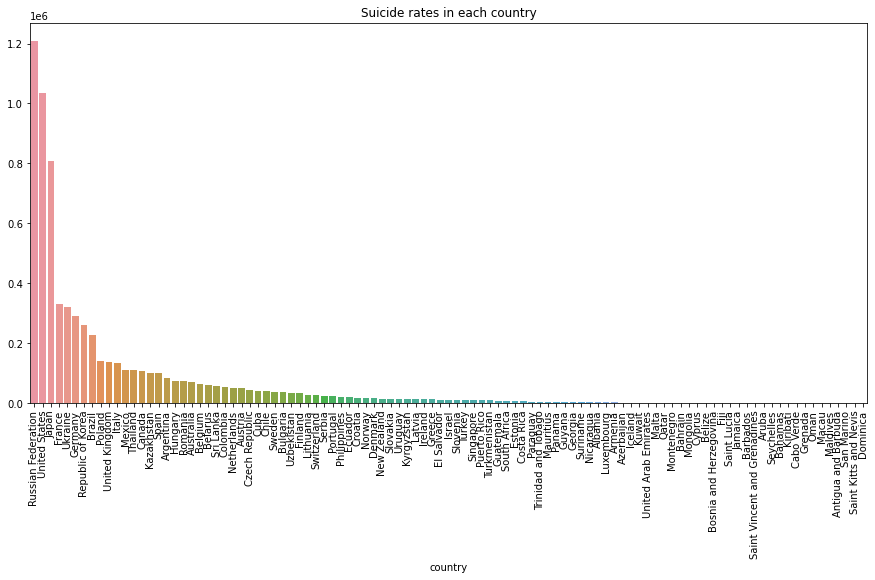

In [13]:
#countries with the highest suicide rates
plt.figure(figsize=(15,7))
coun=df.groupby('country')['suicides_no'].sum().sort_values(ascending=False)
sns.barplot(coun.index,coun.values)
plt.title('Suicide rates in each country')
plt.xticks(rotation=90);

The Russian Federation and United States have the highest suicide counts.This may be due to the very large population of these countries.

In [38]:
## Suicide count over time 1985-2015

Text(0.5, 1.0, 'Suicide count over time 1985-2015')

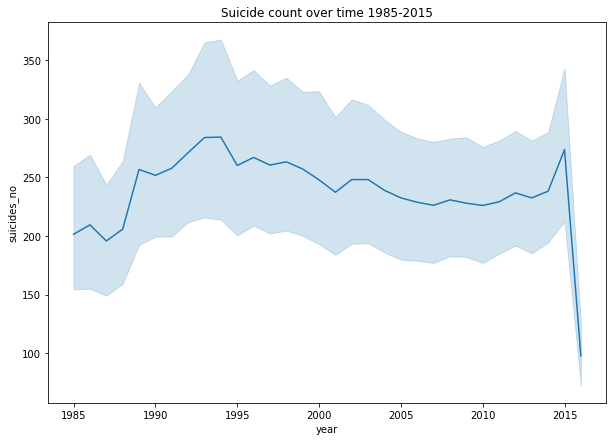

In [14]:
plt.figure(figsize=(10,7))
sns.lineplot(df['year'],df['suicides_no'])
plt.title('Suicide count over time 1985-2015')

According to the above time series plot, although suicide is still a very concerning problem in our society today, 
we can see a sharp decrease in suicide rates from 2015, this can be attributed to the awareness of suicide and mental health, 
improved recognition of those at risk and research aimed at helping those at risk.

## What age group is more inclined to suicide?

In [15]:
df.age.value_counts()

75+ years      4642
25-34 years    4642
35-54 years    4642
15-24 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [16]:
df['age']=df['age'].str.split('-',expand=True)

In [17]:
df['age']=df['age'].str.replace('75+ years','75')

In [18]:
df['Age_new']=df.age.str[:2]
df['Age_new']=df['Age_new'].astype(int)

In [19]:
df['Age_new'].head()

0    15
1    35
2    15
3    75
4    25
Name: Age_new, dtype: int32

In [20]:
#bining the numerical Age column into categories
bins=np.linspace(15,75,5)   
group=['Adolescents','Adults','Middle_aged_adults','Elderly']
df['Age_cat']=pd.cut(df['Age_new'],bins,labels=group,include_lowest=True)

In [21]:
df[['Age_new','Age_cat']].head()

,Age_new,Age_cat
0,15,Adolescents
1,35,Adults
2,15,Adolescents
3,75,Elderly
4,25,Adolescents


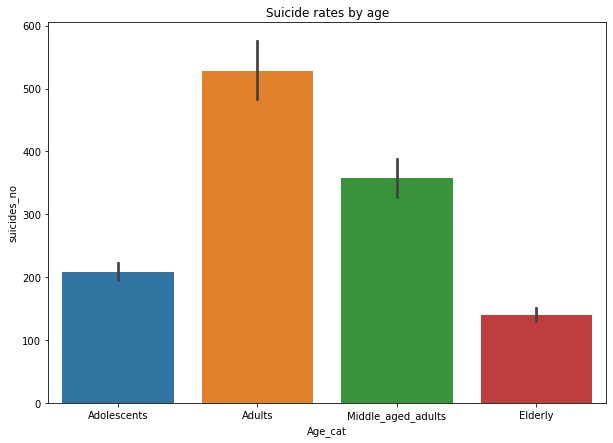

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(df['Age_cat'],df['suicides_no'])
plt.title('Suicide rates by age');

### What is the relationship between sex and suicide rates in different age groups?


<Figure size 720x504 with 0 Axes>

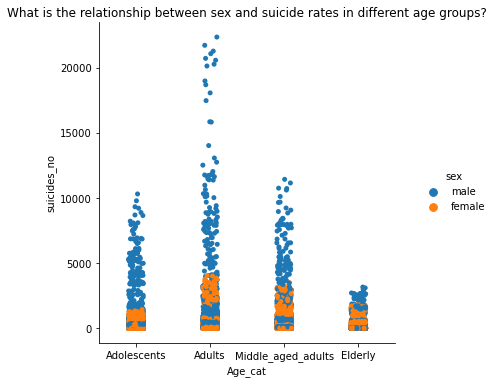

In [23]:
## What is the relationship between sex and suicide rates in different age groups?
plt.figure(figsize=(10,7))
sns.catplot(hue='sex',y='suicides_no',x='Age_cat',data=df)
plt.title('What is the relationship between sex and suicide rates in different age groups?');

Data shows alarming differences in suicides for males and females. It is clear that males are more inclined to suicide than females.


In [34]:
#relationship between numerical columns of our data
corr=df.corr()

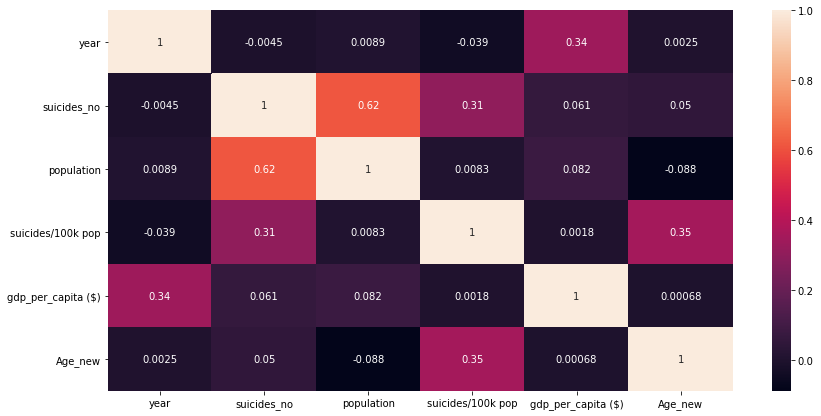

In [35]:
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True);